# Which cities are the best for data science jobs in the USA?

![Data Science City](data_science_city.jpg)

# Methods
* Define Parameters to be used
* Data Collection
    * Indeed API for number of jobs per city
    * Numbeo API for cost of living per city
    * National Center for Education Statistics
* Data Merging
    * Cost of Living and Number of Students
    * Cost of Living, Number of Students and Number of Jobs by City
    * Salary Data from Glassdoor
* Calculated the Normalized Index for Cost of Living
* Visualizations
    * Average Salary Scatter
    * City vs Normalized Cost of Living Index
    * Education requirements for Data Science Jobs
    * Experience Requirements for Data Science Jobs
    * Technology Skills 
    


# Parameters used to determine which cities are best:
   * Cost of living
   * Average Salary
   * Number of jobs in each city for Data Science

In [2]:
# Import the dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import pprint
import json
import re
import csv
import os

## Data pulled from Indeed API
    * Number of jobs per city is calculated

In [3]:
# Exporting the data and creating a DataFrame
df = pd.read_csv("Output_Files/indeed_data.csv")
indeed_df = df
# Output File (CSV)
output_data_file = "../Output_Files/cleaned_indeed_jobs.csv"
indeed_df.drop("onmousedown", axis=1, inplace=True)
indeed_df.drop("indeedApply", axis=1, inplace=True)
indeed_df.drop("expired", axis=1, inplace=True)
indeed_df.drop("formattedLocationFull", axis=1, inplace=True)
unique_df = indeed_df.groupby(["formattedLocation"])["jobtitle"].count()


In [4]:
name_list = [unique_df.index[i].split(', ') for i in range(0, len(unique_df.index))]
name_list = [e[0] for e in name_list]
unique_df.index = name_list
unique_df = unique_df.to_frame()
unique_df = unique_df.reset_index()
unique_df.head()

,index,jobtitle
0,Ada,1
1,Adelphi,1
2,Albuquerque,2
3,Alexandria,3
4,Alpharetta,2


## Cost of Living for different cities is pulled from Numbeo API

In [5]:
# Create a dataframe with Cost of Living Index for all the cities 
df_COLI_complete = pd.read_csv("Output_Files/COLI.csv")
df_COLI_complete["City"] = df_COLI_complete["City"].str.slice(0, -4)
df_COLI_complete = df_COLI_complete.drop(["Rank", "City ID", "Country", "Purchasing Power" ], axis =1)
#df_COLI_complete.head()

## Number of Students enrolled in 4 years degree Public university CSV pulled from "National Center for Education Statistics"

In [6]:
df_student = pd.read_csv("Output_Files/School population by city.csv")
df_student = df_student.rename(columns={"Row Labels": "City"})

df_student["City"] =[df_student["City"][i].lstrip() for i in range(0, len(df_student["City"]))]
df_student.head()

,City,Sum of Student population
0,Miami,112915.0
1,New York,80709.0
2,Houston,79282.0
3,Los Angeles,72573.0
4,Athens,72216.0


## Merged the data for Cost of living, Number of Students

In [7]:
# Create a dataframe with Cost of Living Index and Student population for all the cities 
df_col_complete_student = pd.merge(df_COLI_complete, df_student, how="left", on="City")
df_col_complete_student.head()

,City,Cost Of Living Index,Sum of Student population
0,New York,100.000000,80709.0
1,San Francisco,91.280893,29778.0
2,Anchorage,91.135599,14644.0
3,Honolulu,89.477840,17710.0
4,Brooklyn,88.600780,42068.0


## Merged the data for Cost of living, Number of Students and Number of Jobs on "City"

In [8]:
df_coli_complete_student_jobs = pd.merge(df_col_complete_student, unique_df, how="left", left_on="City", right_on="index")
df_coli_complete_student_jobs.drop("index", axis=1, inplace=True)
df_coli_complete_student_jobs.rename(columns={"jobtitle": "No.of Jobs"}, inplace=True)
df_coli_complete_student_jobs.head()

,City,Cost Of Living Index,Sum of Student population,No.of Jobs
0,New York,100.000000,80709.0,52.0
1,San Francisco,91.280893,29778.0,29.0
2,Anchorage,91.135599,14644.0,1.0
3,Honolulu,89.477840,17710.0,NaN
4,Brooklyn,88.600780,42068.0,NaN


In [9]:
# Upload average salaries from glassdoor
df_salary = pd.read_csv("Output_Files/COLI w average salary.csv")

df_salary["City"] = [df_salary["City"][i].split(', ')[0] for i in range(0, len(df_salary["City"]))]
#df_salary.head()

## Merged the salary data from glassdoor to the dataframe

In [10]:
df_coli_complete_student_jobs_salary = pd.merge(df_coli_complete_student_jobs, df_salary, how="left", left_on="City", right_on="City")
df_coli_complete_student_jobs_salary = df_coli_complete_student_jobs_salary.drop(["Rank", "City ID", "Country", "Purchasing Power", "Cost Of Living Index_y"], axis =1)
df_coli_complete_student_jobs_salary = df_coli_complete_student_jobs_salary.rename(columns={"Cost Of Living Index_x": "Cost Of Living Index"})
df_coli_complete_student_jobs_salary.head()

,City,Cost Of Living Index,Sum of Student population,No.of Jobs,Data Science Average Salary,Data Scientist Low,Data Scientist High,Average Pay vs National Avg,Data Analyst Average Salary,Data Analyst Low,Data Analysts High,Average Pay vs National Avg.1,Data Engineer Average Salary,Data Engineer Low,Data Engineer High,Average Pay vs National Avg.2,Data Architect Average Salary,Data Architect Low,Data Architect High,Average Pay vs National Avg.3
0,New York,100.000000,80709.0,52.0,"$95,342.00","$73,000.00","$125,000.00",0%,"$56,071.00","$39,000.00","$77,000.00",7%,"$93,392.00","$69,000.00","$132,000.00",7%,"$88,150.00","$66,000.00","$114,000.00",6%
1,San Francisco,91.280893,29778.0,29.0,"$119,907.00","$93,000.00","$154,000.00",26%,"$70,015.00","$49,000.00","$95,000.00",33%,"$107,660.00","$81,000.00","$149,000.00",24%,"$101,802.00","$77,000.00","$130,000.00",23%
2,Anchorage,91.135599,14644.0,1.0,"$92,896.00","$72,000.00","$121,000.00",-3%,"$55,024.00","$38,000.00","$75,000.00",5%,"$84,834.00","$63,000.00","$121,000.00",-3%,"$86,783.00","$66,000.00","$112,000.00",5%
3,Honolulu,89.477840,17710.0,NaN,"$87,004.00","$67,000.00","$114,000.00",-9%,"$52,013.00","$36,000.00","$71,000.00",-1%,"$79,596.00","$59,000.00","$114,000.00",-9%,"$81,169.00","$61,000.00","$105,000.00",-2%
4,Brooklyn,88.600780,42068.0,NaN,"$95,342.00","$73,000.00","$125,000.00",0%,"$56,071.00","$39,000.00","$77,000.00",7%,"$93,392.00","$69,000.00","$132,000.00",7%,"$88,150.00","$66,000.00","$114,000.00",6%


## Merged the Average Salary information

In [11]:
cities = df_COLI_complete["City"]

In [12]:
avg_salary = [134331.00, 161743.00, 103574.00, 100336.00, 100336.00, 125697.00, 92615.00, 123915.00, 123915.00,
              155451.00, 115912.00, 93041.00, 122194.00, 146202.00, 114914.00, 100372.00, 108227.00, 108994.00,
              120914.00, 104564.00, 115589.00, 114337.00, 129231.00, 106862.00, 100161.00, 112906.00, 112906.00,
              134233.00, 116869.00, 105176.00, 114054.00, 95440.00, 105575.00, 161022.00, 102829.00, 114153.00, 
              110652.00, 94649.00, 115614.00, 84254.00, 114744.00, 93872.00, 145960.00, 101190.00, 126357.00,
              96366.00, 100331.00, 127686.00, 115351.00, 119778.00, 99338.00, 110173.00, 95783.00, 114947.00, 
              115129.00, 94929.00, 95729.00, 90917.00]

In [13]:
df_indeed_salary = pd.DataFrame({"Avg Salary Indeed": avg_salary,
                                "City": cities
                                })

In [14]:
df_col_complete_student_jobs_salary_final = pd.merge(df_coli_complete_student_jobs_salary, df_indeed_salary, how="left", left_on="City", right_on="City")
df_col_complete_student_jobs_salary_final = df_col_complete_student_jobs_salary_final[['City', 'No.of Jobs', 'Avg Salary Indeed', 'Cost Of Living Index',
                                                'Sum of Student population', 'Data Science Average Salary', 'Data Scientist Low',
                                                'Data Scientist High','Average Pay vs National Avg', 'Data Analyst Average Salary',
                                                'Data Analyst Low', 'Data Analysts High', 'Average Pay vs National Avg.1', 
                                                'Data Engineer Average Salary','Data Engineer Low', 'Data Engineer High', 
                                                'Average Pay vs National Avg.2', 'Data Architect Average Salary', 
                                                'Data Architect Low', 'Data Architect High', 'Average Pay vs National Avg.3']]
df_col_complete_student_jobs_salary_final.head()

,City,No.of Jobs,Avg Salary Indeed,Cost Of Living Index,Sum of Student population,Data Science Average Salary,Data Scientist Low,Data Scientist High,Average Pay vs National Avg,Data Analyst Average Salary,...,Data Analysts High,Average Pay vs National Avg.1,Data Engineer Average Salary,Data Engineer Low,Data Engineer High,Average Pay vs National Avg.2,Data Architect Average Salary,Data Architect Low,Data Architect High,Average Pay vs National Avg.3
0,New York,52.0,134331.0,100.000000,80709.0,"$95,342.00","$73,000.00","$125,000.00",0%,"$56,071.00",...,"$77,000.00",7%,"$93,392.00","$69,000.00","$132,000.00",7%,"$88,150.00","$66,000.00","$114,000.00",6%
1,San Francisco,29.0,161743.0,91.280893,29778.0,"$119,907.00","$93,000.00","$154,000.00",26%,"$70,015.00",...,"$95,000.00",33%,"$107,660.00","$81,000.00","$149,000.00",24%,"$101,802.00","$77,000.00","$130,000.00",23%
2,Anchorage,1.0,103574.0,91.135599,14644.0,"$92,896.00","$72,000.00","$121,000.00",-3%,"$55,024.00",...,"$75,000.00",5%,"$84,834.00","$63,000.00","$121,000.00",-3%,"$86,783.00","$66,000.00","$112,000.00",5%
3,Honolulu,NaN,100336.0,89.477840,17710.0,"$87,004.00","$67,000.00","$114,000.00",-9%,"$52,013.00",...,"$71,000.00",-1%,"$79,596.00","$59,000.00","$114,000.00",-9%,"$81,169.00","$61,000.00","$105,000.00",-2%
4,Brooklyn,NaN,100336.0,88.600780,42068.0,"$95,342.00","$73,000.00","$125,000.00",0%,"$56,071.00",...,"$77,000.00",7%,"$93,392.00","$69,000.00","$132,000.00",7%,"$88,150.00","$66,000.00","$114,000.00",6%


## Formula Used to Calculate Normalized Index = (1/(%Cost Of Living Index)) x Avg Salary / NY Avg Salary

In [15]:
# Extracting the salary of New york into a variable
New_York_Salary = df_col_complete_student_jobs_salary_final.loc[df_col_complete_student_jobs_salary_final['City'] == "New York"]["Avg Salary Indeed"]
# Calculate the index based on average salary and cost of living of every city and normalize it for New york
list = np.array([(100*df_col_complete_student_jobs_salary_final["Avg Salary Indeed"][i]/\
                                                           df_col_complete_student_jobs_salary_final["Cost Of Living Index"][i])/New_York_Salary for i in range(0,len(df_col_complete_student_jobs_salary_final))]).tolist()
# Flattening the list of lists and assigning it to a new coloumn in dataframe
df_col_complete_student_jobs_salary_final["SalaryCOLIndex"] = [y for x in list for y in x]
# Rearranging the order of the columns as desired
df_col_complete_student_jobs_salary_final =df_col_complete_student_jobs_salary_final[['City', 'No.of Jobs', 'Avg Salary Indeed','Cost Of Living Index',"SalaryCOLIndex", 'Sum of Student population',
        'Data Science Average Salary', 'Data Scientist Low',
       'Data Scientist High', 'Average Pay vs National Avg',
       'Data Analyst Average Salary', 'Data Analyst Low', 'Data Analysts High',
       'Average Pay vs National Avg.1', 'Data Engineer Average Salary',
       'Data Engineer Low', 'Data Engineer High',
       'Average Pay vs National Avg.2', 'Data Architect Average Salary',
       'Data Architect Low', 'Data Architect High',
       'Average Pay vs National Avg.3']]
#df_col_complete_student_jobs_salary_final.head()

## Complete dataFrame

In [16]:
df_col_complete_student_jobs_salary_final.head()

,City,No.of Jobs,Avg Salary Indeed,Cost Of Living Index,SalaryCOLIndex,Sum of Student population,Data Science Average Salary,Data Scientist Low,Data Scientist High,Average Pay vs National Avg,...,Data Analysts High,Average Pay vs National Avg.1,Data Engineer Average Salary,Data Engineer Low,Data Engineer High,Average Pay vs National Avg.2,Data Architect Average Salary,Data Architect Low,Data Architect High,Average Pay vs National Avg.3
0,New York,52.0,134331.0,100.000000,1.000000,80709.0,"$95,342.00","$73,000.00","$125,000.00",0%,...,"$77,000.00",7%,"$93,392.00","$69,000.00","$132,000.00",7%,"$88,150.00","$66,000.00","$114,000.00",6%
1,San Francisco,29.0,161743.0,91.280893,1.319075,29778.0,"$119,907.00","$93,000.00","$154,000.00",26%,...,"$95,000.00",33%,"$107,660.00","$81,000.00","$149,000.00",24%,"$101,802.00","$77,000.00","$130,000.00",23%
2,Anchorage,1.0,103574.0,91.135599,0.846031,14644.0,"$92,896.00","$72,000.00","$121,000.00",-3%,...,"$75,000.00",5%,"$84,834.00","$63,000.00","$121,000.00",-3%,"$86,783.00","$66,000.00","$112,000.00",5%
3,Honolulu,NaN,100336.0,89.477840,0.834767,17710.0,"$87,004.00","$67,000.00","$114,000.00",-9%,...,"$71,000.00",-1%,"$79,596.00","$59,000.00","$114,000.00",-9%,"$81,169.00","$61,000.00","$105,000.00",-2%
4,Brooklyn,NaN,100336.0,88.600780,0.843030,42068.0,"$95,342.00","$73,000.00","$125,000.00",0%,...,"$77,000.00",7%,"$93,392.00","$69,000.00","$132,000.00",7%,"$88,150.00","$66,000.00","$114,000.00",6%


In [17]:
df_col_complete_student_jobs_salary_final = df_col_complete_student_jobs_salary_final.sort_values(by=['No.of Jobs'], ascending=False)
df_col_complete_student_jobs_salary_final.head()

,City,No.of Jobs,Avg Salary Indeed,Cost Of Living Index,SalaryCOLIndex,Sum of Student population,Data Science Average Salary,Data Scientist Low,Data Scientist High,Average Pay vs National Avg,...,Data Analysts High,Average Pay vs National Avg.1,Data Engineer Average Salary,Data Engineer Low,Data Engineer High,Average Pay vs National Avg.2,Data Architect Average Salary,Data Architect Low,Data Architect High,Average Pay vs National Avg.3
0,New York,52.0,134331.0,100.000000,1.000000,80709.0,"$95,342.00","$73,000.00","$125,000.00",0%,...,"$77,000.00",7%,"$93,392.00","$69,000.00","$132,000.00",7%,"$88,150.00","$66,000.00","$114,000.00",6%
1,San Francisco,29.0,161743.0,91.280893,1.319075,29778.0,"$119,907.00","$93,000.00","$154,000.00",26%,...,"$95,000.00",33%,"$107,660.00","$81,000.00","$149,000.00",24%,"$101,802.00","$77,000.00","$130,000.00",23%
8,Seattle,27.0,123915.0,85.556800,1.078185,47400.0,"$106,358.00","$83,000.00","$137,000.00",11%,...,"$76,000.00",6%,"$87,612.00","$66,000.00","$124,000.00",1%,"$88,133.00","$67,000.00","$114,000.00",6%
9,Boston,21.0,123915.0,82.666323,1.115884,16164.0,"$93,032.00","$71,000.00","$121,000.00",-3%,...,"$76,000.00",5%,"$82,256.00","$61,000.00","$118,000.00",-5%,"$86,720.00","$66,000.00","$112,000.00",5%
11,Chicago,21.0,115912.0,79.986539,1.078786,42750.0,"$86,460.00","$66,000.00","$113,000.00",-10%,...,"$70,000.00",-3%,"$79,689.00","$59,000.00",$115.00,-8%,"$88,069.00","$67,000.00","$113,000.00",6%


# Average Salary Scatter

Text(0, 0.5, 'Salary')

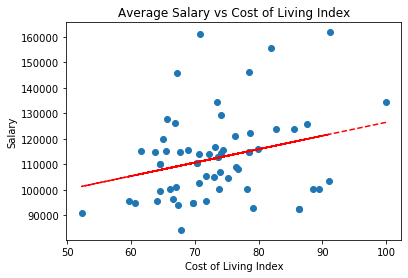

In [32]:
x = df_col_complete_student_jobs_salary_final['Cost Of Living Index']
y = df_col_complete_student_jobs_salary_final['Avg Salary Indeed']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.title('Average Salary vs Cost of Living Index')
plt.xlabel('Cost of Living Index')
plt.ylabel('Salary')


# Cities Vs. Normalized Cost Of Living Index

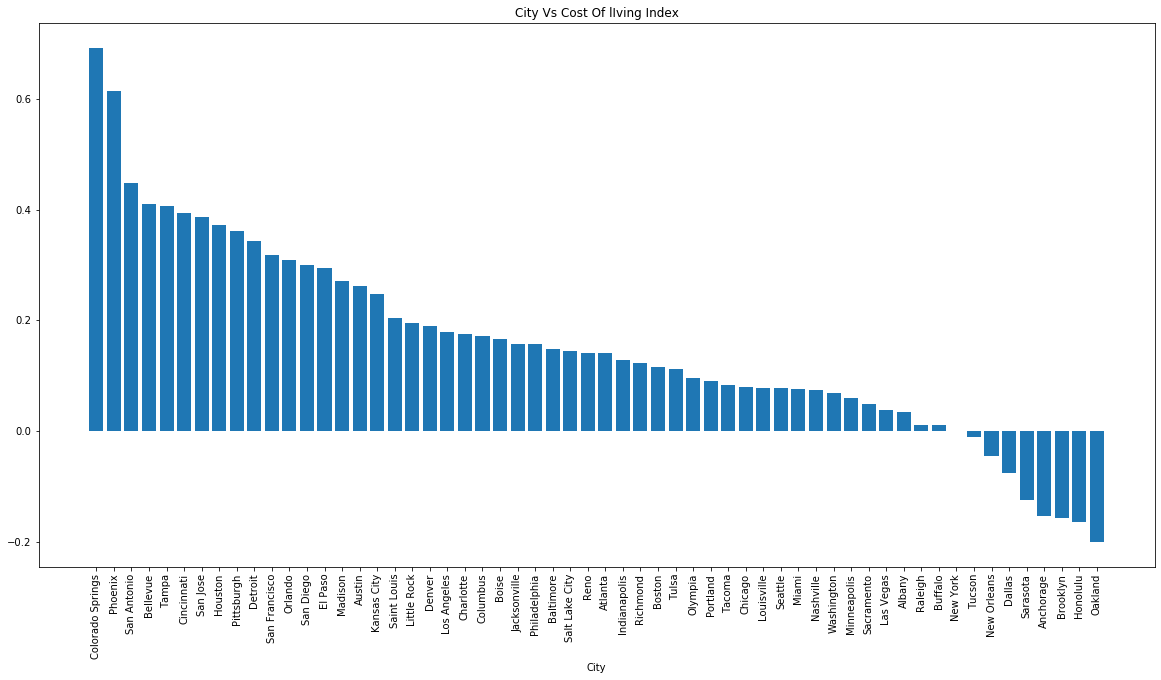

<Figure size 432x288 with 0 Axes>

In [19]:
# Graph to plot number of cureent jobs Vs Citites
df_SalaryCOLIndex_Cities = df_col_complete_student_jobs_salary_final.sort_values(by=['SalaryCOLIndex'], ascending=False)
#df_SalaryCOLIndex_Cities.columns
df_SalaryCOLIndex_Cities = df_SalaryCOLIndex_Cities[['City', 'No.of Jobs', 'Avg Salary Indeed','Cost Of Living Index',"SalaryCOLIndex", "Sum of Student population"]]
df_SalaryCOLIndex_Cities.head()
#df_final["SalaryCOLIndex"].values
plt.figure(figsize=(20,10))
plt.xlabel("City")
plt.title("City Vs Cost Of lIving Index")
plt.xticks(rotation='vertical')
# plt.yticks(ticks=df_final["SalaryCOLIndex"], labels=df_final["SalaryCOLIndex"].values.tolist())
plt.bar(df_SalaryCOLIndex_Cities["City"],df_SalaryCOLIndex_Cities["SalaryCOLIndex"] -1)
plt.show()
# Save t he plots in another folder
plt.savefig("Plots/CitiesVsCOLI.png")

# Education requuirements for Data Science jobs

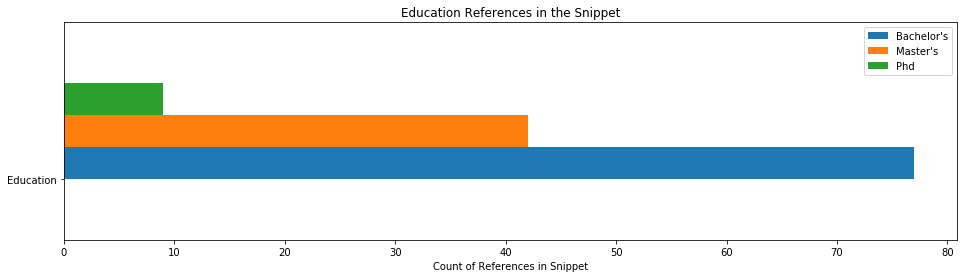

In [28]:
# Education requirement for the Jobs
def has_bachelor(s):
    return (
        bool(re.search(r"bachelors?'?s?", s, re.IGNORECASE)) or
        bool(re.search(r"\sB\.?A\.?\s", s, re.IGNORECASE)) or
        bool(re.search(r"\sB\.?S\.?\s", s, re.IGNORECASE))
    )
def has_masters(s):
    return (
        bool(re.search(r"masters?'?s?\s", s, re.IGNORECASE)) or
        bool(re.search(r"\sM\.?A\.?\s", s, re.IGNORECASE)) or
        bool(re.search(r"\sM\.?S\.?\s", s, re.IGNORECASE)) or
        bool(re.search(r"M\.?B\.?A\.?\s", s, re.IGNORECASE))
    )
def has_phd(s):
    return(
        (bool(re.search(r"Ph\.?d", s, re.IGNORECASE))) 
    )
education_df = pd.DataFrame({
    "Bachelor's": indeed_df["snippet"].apply(has_bachelor).value_counts(())[1],
    "Master's": indeed_df["snippet"].apply(has_masters).value_counts(())[1],
    "Phd": indeed_df["snippet"].apply(has_phd).value_counts(())[1],
},index=["Education"])
education_df.plot(kind='barh', figsize=(16,4), align='edge', width=.4)
plt.xlabel("Count of References in Snippet")
plt.title('Education References in the Snippet')
education_df
# Save the plots in another folder


plt.savefig("Plots/EducationVSCount.png")

* We used regex to find education requirements for Data Science jobs.

# Number of years of experience requirement for the Data Science Jobs

In [21]:
def extract_years_only(s):
    results = re.findall(r"([0-9]*)\+?.[yY]ear.*", s)
    if results and results[0]:
        return int(results[0])
    else:
        return np.nan

In [22]:
years = df["snippet"].apply(lambda s: extract_years_only(s))
df_years=pd.DataFrame(years.value_counts().sort_index())

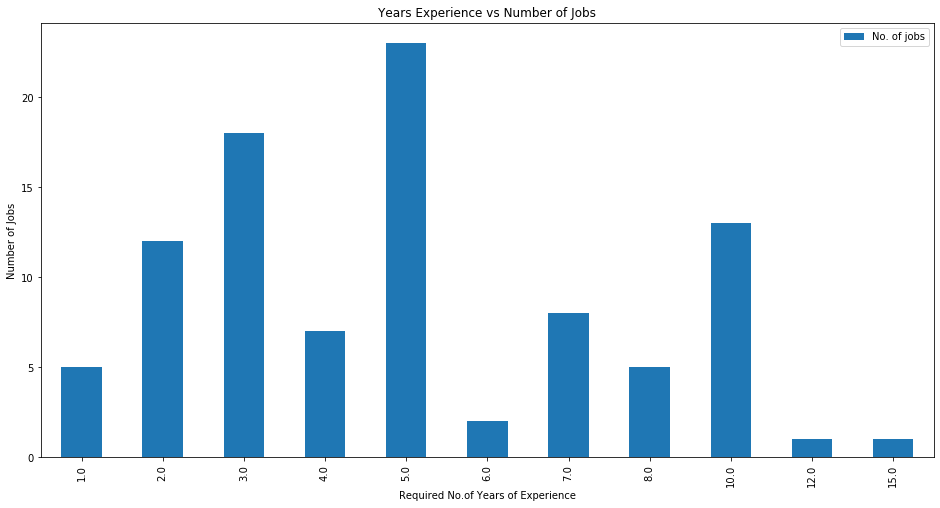

In [34]:
df_years=df_years.rename(columns={"snippet":"No. of jobs"})
df_years.index.name ="Required No.of Years of Experience"

df_years.plot(kind='bar', figsize=(16,8))
plt.title('Years Experience vs Number of Jobs')
plt.ylabel('Number of Jobs')
# Save t he plots in another folder
plt.savefig("Plots/YearsofExpVsJobCount.png")

* We used regex to find required number of years of Experience.

In [24]:
df_years["No. of jobs"].sum()

95

# Which Technology skills are in most demand

In [25]:
def extract_tech_count(s, tech):
    result_count = re.findall(tech, s)

    if result_count:
        return len(result_count)
    else:
        return np.nan

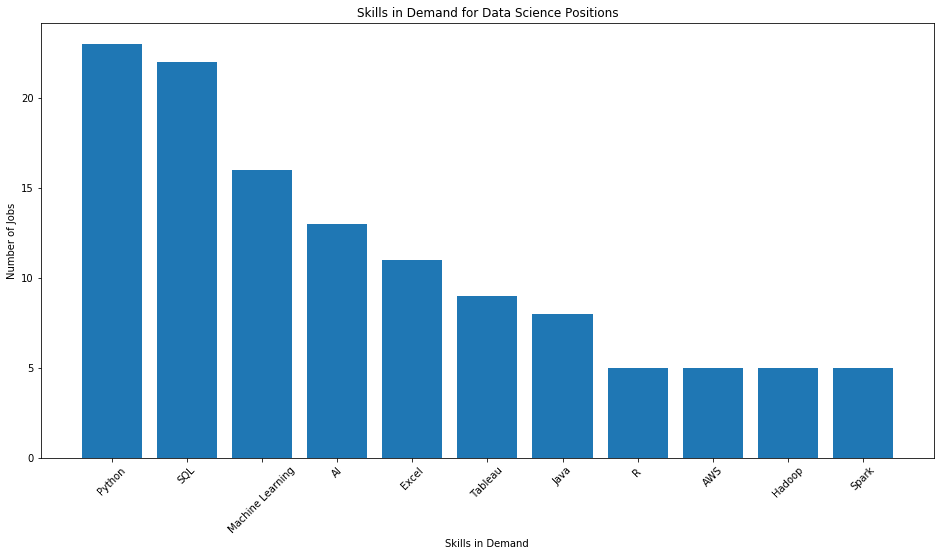

In [36]:
df_tech = pd.DataFrame(columns={"Tech", "No.ofJobs"})
tech_list = ["Python"," R ","SQL","Tableau", "Java", "AWS", "Hadoop", "Spark", "Machine Learning", "AI", "Excel"]

sample = df["snippet"]

for tech in tech_list:
    count =0
    job_tech = sample.apply(lambda s: extract_tech_count(s, tech))
  
    for i in range(0, len(job_tech)):
   
        if(pd.notna(job_tech[i])):
            count += 1
        else:
            continue
    tech_list_count = pd.DataFrame({"Tech":[tech], "No.ofJobs":[count]})
    df_tech = df_tech.append(tech_list_count)

df_tech = df_tech.sort_values(by = "No.ofJobs", ascending = False)
df_tech.set_index("Tech")
plt.figure(figsize=(16,8))
plt.bar(df_tech["Tech"],df_tech["No.ofJobs"] )
plt.xticks(rotation=45)
plt.title('Skills in Demand for Data Science Positions')
plt.ylabel('Number of Jobs')
plt.xlabel('Skills in Demand')
# Save t he plots in another folder
plt.savefig("Plots/TechnologyVsCount.png")

* We used regex to find top skills in the demand